# 在逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)

X = np.random.normal(0.0, 1.0, size=(200, 2))
y= np.array( (X[:,0]**2 + X[:,1]**2) < 1.5, dtype='int')

In [3]:
X.shape

(200, 2)

In [4]:
y.shape

(200,)

In [5]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

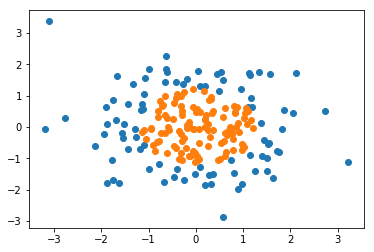

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## 使用逻辑回归

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr_reg=LogisticRegression()

In [9]:
lr_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
lr_reg.score(X,y)

0.60499999999999998

In [11]:
lr_reg.coef_

array([[ 0.13752939, -0.05069213]])

In [12]:
lr_reg.intercept_

array([ 0.25690117])

In [18]:
def x2(x1):
    return (-lr_reg.intercept_[0] - lr_reg.coef_[0][0]*x1)/lr_reg.coef_[0][1]

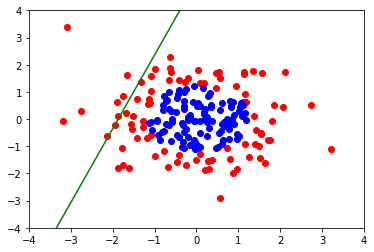

In [21]:
x1_plot=np.linspace(-4.0, 4.0, 1000)
x2_plot=x2(x1_plot)

plt.scatter(X[y==0,0],X[y==0,1], color='r')
plt.scatter(X[y==1,0],X[y==1,1], color='b')
plt.plot(x1_plot, x2_plot, color='g')
plt.axis([-4.0, 4.0, -4.0, 4.0])
plt.show()

## 添加多项式

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [25]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lr_reg', LogisticRegression())
    ])

In [26]:
poly_lr_reg=PolynomialLogisticRegression(2)
poly_lr_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
poly_lr_reg.score(X,y)

0.94999999999999996

In [28]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    
    X_new=np.c_[x0.ravel(), x1.ravel()]
    
    y_predict=model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap=ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

d:\users\user\anaconda3\envs\keras\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


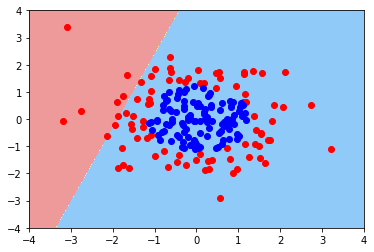

In [29]:
plot_decision_boundary(lr_reg, [-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1], color='r')
plt.scatter(X[y==1,0],X[y==1,1], color='b')
plt.show()

### 多项式边界

d:\users\user\anaconda3\envs\keras\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


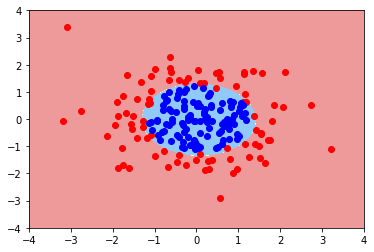

In [30]:
plot_decision_boundary(poly_lr_reg, [-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1], color='r')
plt.scatter(X[y==1,0],X[y==1,1], color='b')
plt.show()

In [31]:
poly_lr_reg20=PolynomialLogisticRegression(20)
poly_lr_reg20.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

d:\users\user\anaconda3\envs\keras\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


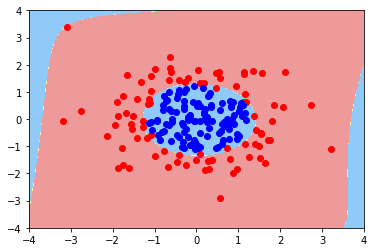

In [32]:
plot_decision_boundary(poly_lr_reg20, [-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1], color='r')
plt.scatter(X[y==1,0],X[y==1,1], color='b')
plt.show()